In [79]:
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,BatchNormalization


In [80]:
train_loc="LP-IV-datasets/CIFR_Ass2_3/train_data.csv"
test_loc="LP-IV-datasets/CIFR_Ass2_3/test_data.csv"

In [81]:
df_train=pd.read_csv(train_loc)
df_test=pd.read_csv(test_loc)

In [82]:
df_train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,...,39,41,56,36,38,53,37,39,54,2
49996,255,245,132,254,247,134,255,249,137,254,...,249,174,79,252,181,81,253,181,76,6
49997,35,178,235,40,176,239,42,176,241,39,...,27,52,77,21,43,66,12,31,50,9
49998,189,211,240,186,208,236,185,207,235,184,...,195,184,169,196,189,171,195,190,171,1


In [83]:
df_test

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
1,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
2,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
3,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0
4,65,68,50,70,81,64,48,64,46,30,...,143,179,136,154,185,146,128,156,117,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,78,133,76,78,134,77,80,132,76,...,204,219,236,200,215,234,199,216,236,8
9996,81,57,43,91,69,53,98,75,63,106,...,155,139,129,171,167,147,167,164,160,3
9997,20,15,12,19,14,11,15,14,11,15,...,24,23,50,26,23,53,25,20,47,5
9998,25,40,12,15,36,3,23,41,18,17,...,93,124,80,95,123,81,92,120,80,1


In [84]:
img_data=df_train.iloc[:,:-1].values

In [85]:
img_data

array([[ 59,  62,  63, ..., 123,  92,  72],
       [154, 177, 187, ..., 143, 133, 144],
       [255, 255, 255, ...,  80,  86,  84],
       ...,
       [ 35, 178, 235, ...,  12,  31,  50],
       [189, 211, 240, ..., 195, 190, 171],
       [229, 229, 239, ..., 163, 163, 161]], dtype=int64)

In [86]:
label_data=df_train.iloc[:,3072].values

In [87]:
label_data

array([6, 9, 9, ..., 9, 1, 1], dtype=int64)

In [88]:
output_folder="ff_cifar_images/train"
os.makedirs(output_folder,exist_ok=True)

num_imgs=20000

for i in range(num_imgs):
    pixel_val=img_data[i,:].reshape(32,32,3)
    label=label_data[i]

    pixel_values_uint8 = (pixel_val * 255).astype(np.uint8)

    label_folder=os.path.join(output_folder,str(label))
    os.makedirs(label_folder,exist_ok=True)

    pic_img=os.path.join(label_folder,f"index_{i}.png")
    plt.imsave(pic_img,pixel_values_uint8,cmap='gray')




In [90]:
img_data=df_test.iloc[:,:-1].values
label_data=df_test.iloc[:,3072].values

output_folder="ff_cifar_images/test"
os.makedirs(output_folder,exist_ok=True)

num_imgs=1000

for i in range(num_imgs):
    pixel_val=img_data[i,:].reshape(32,32,3)
    label=label_data[i]

    pixel_values_uint8 = (pixel_val * 255).astype(np.uint8)

    label_folder=os.path.join(output_folder,str(label))
    os.makedirs(label_folder,exist_ok=True)

    pic_img=os.path.join(label_folder,f"index_{i}.png")
    plt.imsave(pic_img,pixel_values_uint8,cmap='gray')




In [91]:
train="ff_cifar_images/train/"
test="ff_cifar_images/test/"


In [92]:
train_datagen=ImageDataGenerator(
    rescale=1.0/255
)

test_datagen=ImageDataGenerator(
    rescale=1.0/255
)

In [93]:
train_generator=train_datagen.flow_from_directory(
    train,
    batch_size=20000,
    color_mode='grayscale',
    class_mode='sparse',
    target_size=(32,32)
)

test_generator=test_datagen.flow_from_directory(
    test,
    batch_size=1000,
    color_mode='grayscale',
    class_mode='sparse',
    target_size=(32,32)
)

Found 20000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [94]:
x_train,y_train=train_generator[0]
x_test,y_test=test_generator[0]

In [95]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [96]:
x_train.shape

(20000, 32, 32, 1)

In [97]:
y_train.shape

(20000,)

In [98]:
from keras.models import Sequential,Model
from keras.layers import Flatten,Input
from keras.optimizers import SGD

In [99]:
# number of classes
K = len(set(y_train))
# calculate total number of classes 
# for output layer
print("number of classes:", K)
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)
 
model = Model(i, x)

number of classes: 10


In [100]:
# model = Sequential([
#     Conv2D(32,(3,3),input_shape=(32,32,1),activation='relu'),
#     BatchNormalization(),
#     Conv2D(64, (3,3), activation='relu'),
#     # BatchNormalization(),
#     MaxPooling2D((2,2)),
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(10,activation='softmax'),

# ])



In [101]:
# sgd=SGD(learning_rate=0.1)
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 batch_normalization_15 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_16 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0   

                                                                 
 dense_9 (Dense)             (None, 10)                10250     
                                                                 
Total params: 2,396,650
Trainable params: 2,395,754
Non-trainable params: 896
_________________________________________________________________


In [102]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs = 11)

Epoch 1/11
625/625 [==============================] - 115s 182ms/step - loss: 2.0283 - accuracy: 0.3298 - val_loss: 1.7186 - val_accuracy: 0.3790
Epoch 2/11
625/625 [==============================] - 112s 179ms/step - loss: 1.5018 - accuracy: 0.4710 - val_loss: 1.9115 - val_accuracy: 0.3310
Epoch 3/11
625/625 [==============================] - 136s 218ms/step - loss: 1.2514 - accuracy: 0.5635 - val_loss: 1.1485 - val_accuracy: 0.6090
Epoch 4/11
625/625 [==============================] - 133s 213ms/step - loss: 1.0290 - accuracy: 0.6393 - val_loss: 1.1041 - val_accuracy: 0.6130
Epoch 5/11
625/625 [==============================] - 122s 196ms/step - loss: 0.8492 - accuracy: 0.7027 - val_loss: 1.2746 - val_accuracy: 0.6140
Epoch 6/11
625/625 [==============================] - 111s 178ms/step - loss: 0.7011 - accuracy: 0.7527 - val_loss: 0.8177 - val_accuracy: 0.7190
Epoch 7/11
625/625 [==============================] - 113s 181ms/step - loss: 0.5670 - accuracy: 0.8005 - val_loss: 0.8729 -

In [103]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

32/32 [==============================] - 1s 34ms/step - loss: 0.9930 - accuracy: 0.7440
Loss:  0.9930389523506165
Accuracy:  0.7440000176429749


In [107]:
from keras.utils import to_categorical

y = to_categorical(y_test)
predicted_value = model.predict(x_test)
labels = list(test_generator.class_indices.keys())

32/32 [==============================] - 2s 48ms/step


Actual Number:  6
Predicted Number:  6


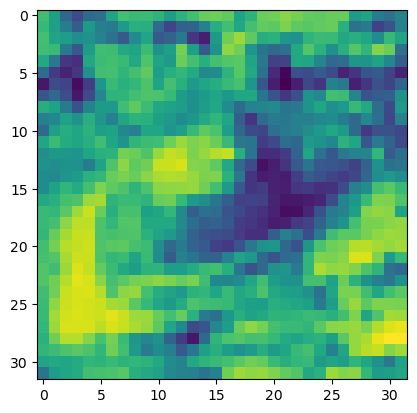

In [109]:
n = 15
plt.imshow(x_test[n])
print("Actual Number: ",labels[np.argmax(y[n])])
print("Predicted Number: ", labels[np.argmax(predicted_value[n])])

In [110]:
history = history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

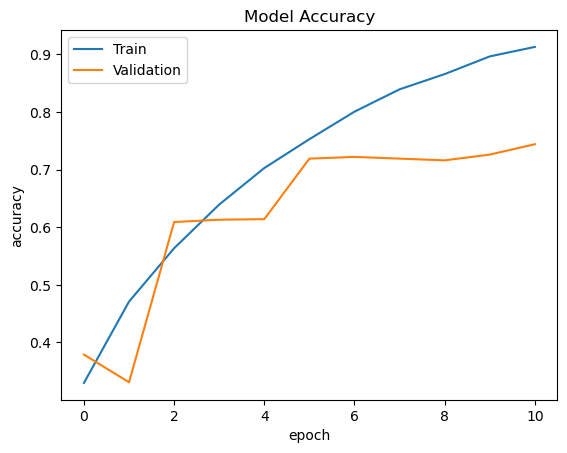

In [111]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', "Validation"], loc='upper left')

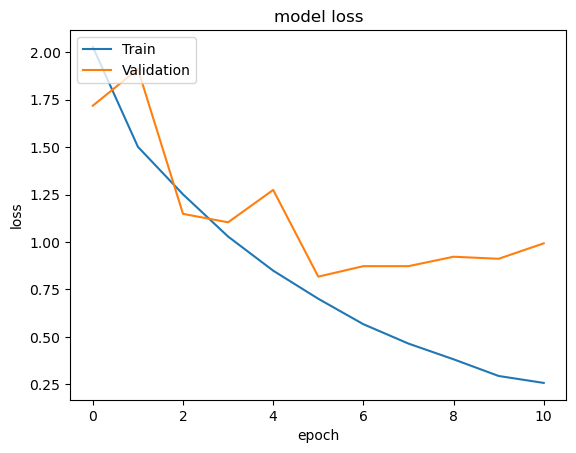

In [112]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

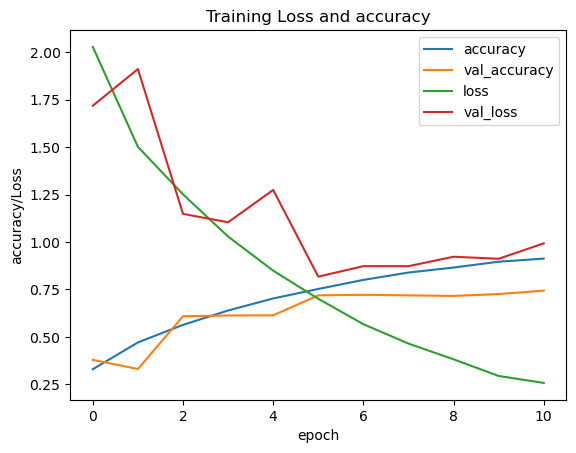

In [113]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])